# Post-processing the data from variational monte carlo

In this jupyter notebook we will present our post-analytical results from several different runs with different parameters. All of the .txt files will be found in the directory "Results". Another reason to use a Jupyter Notebook is to generate reproducibility. Thus, the latest updated jupyter notebook should also show the same figures and results as the ones included in the final report. However, please be aware that the results will change every run as a result of random walks in the metropolis algorithm and initial setup of the system. 

The structure of this notebook is as following. 
- Non-interactive case
    - Searching for best parameters. 
        - 2, 10 and 20 hidden nodes for different learning rates and sigma. 
    - Statistical Analysis of best parameters
- Interactive case
    - Searching for best parameters. 
        - 2, 5, 10  and 20 hidden nodes for different learning rates and sigma. 
    - Statistical Analysis of best parameters
    
Some of the smaller subsections are only for visualization purpose, and this notebook shows how we progress through our results. Thus, some of the figures made does not neccessarily show what we wanted to visualize, and therefore for the best read through it is recommended to read the project article in addition. 

Firstly, we need to define which libraries should be included. Lots of these are self-explanatory, while seaborn is added for some beautiful and handy visualization tools.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from matplotlib import cm
import os
import pandas as pd
import seaborn as sns
from IPython.display import display

# Where to save the figures and data files
DATA_ID = "Results/"

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

#Latex font for plots
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams.update({'font.size': 12}) # Setting all font sizesimport numpy as np

This notebook will be dedicated to two cases of the quantum mechanical system; Non-interactive case and interacting case.

## Non-interactive case

For the easiest case of only one particle in 1 dimension, we analyse how our restricted Boltzmann machine converges to the ground state energy of the system, with different samplers. This situation is treated as a spherical harmoic oscillator with no interaction. All of the data has been runned with a random start configuration. 

If the reader has some experience within machine learning, he would know that the search for 'best' parameters is an extensive process, and in this case we will limit our search to the number of Monte Carlo cycles as 2^17 and optimazation steps as 500, with an equilibration fraction as 0.1 of Monte Carlo cycles. We are running the program in such a fashion that we are very much able to adapt to a statistical analysis using the blocking method, shuch that the total number of Monte Carlo cycles will actually be $2^{17} + 0.1\cdot 2^{17}$. 

We will be varying the number of hidden layers (as we go), and the value of the learning parameter $\eta$. We start off with only two hidden nodes. 

In [2]:
nh_2 = {}
nh_10 = {}
nh_20 = {}
print("Loading files...")
for i in range(1,6):
    nh_2['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/E_eta_2^-"        +str(i) + "_nh_2_nx_1MC_2^17.dat"))
    nh_2['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/E_eta_2^-"+str(i) + "_nh_2_nx_1MC_2^17.dat"))
    nh_2['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/E_eta_2^-"              +str(i) + "_nh_2_nx_1MC_2^17.dat"))

for i in range(2,6):
    nh_10['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/E_eta_2^-"        +str(i) + "_nh_10_nx_1MC_2^17.dat"))
    nh_10['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/E_eta_2^-"+str(i) + "_nh_10_nx_1MC_2^17.dat"))
    nh_10['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/E_eta_2^-"              +str(i) + "_nh_10_nx_1MC_2^17.dat"))

for i in range(3,6):
    nh_20['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/E_eta_2^-"        +str(i) + "_nh_20_nx_1MC_2^17.dat"))
    nh_20['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/E_eta_2^-"+str(i) + "_nh_20_nx_1MC_2^17.dat"))
    nh_20['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/E_eta_2^-"              +str(i) + "_nh_20_nx_1MC_2^17.dat"))
print("Loading completed")

Loading files...
Loading completed


## Searching for best parameters
### 2 hidden nodes

First off we want to compare the different types of sampling with eachother for $2$ hidden nodes. 

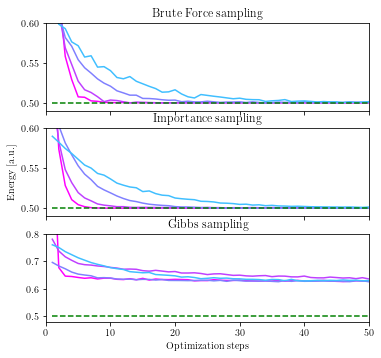

In [3]:

nh = nh_2


# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*0.5


c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0
for i in range(2,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')

  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])

ax1.set_ylim([0.49,0.6])
ax2.set_ylim([0.49,0.6])
ax3.set_ylim([0.48,0.8])


#fig.text(0.834,0.095,r'$\eta$')
#fig.text(0.88,0.87,r'$5.0 \times 10^{-1}$')
#coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.1,extend='min')
#coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
#coloriarobaro.update_ticks()

plt.savefig(data_path('nh_2_first50.pgf'))
plt.show()

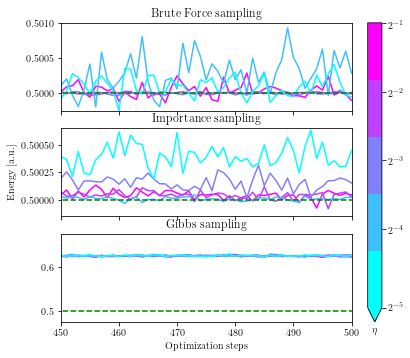

In [4]:
nh = nh_2
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([450,500])
ax2.set_xlim([450,500])
ax3.set_xlim([450,500])

low_limit1  = 0.9995*correct_energy
high_limit1 = 1.002*correct_energy

low_limit2  = 0.9997*correct_energy
high_limit2 = 1.0013*correct_energy

low_limit3  = 0.95*correct_energy
high_limit3 = 1.35*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.865,r'$2^{-1}$')
fig.text(0.91,0.694,r'$2^{-2}$')
fig.text(0.91,0.523,r'$2^{-3}$')
fig.text(0.91,0.348,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)
    
plt.savefig(data_path('nh_2_last50.pgf'))

plt.show()

### 10 hidden nodes

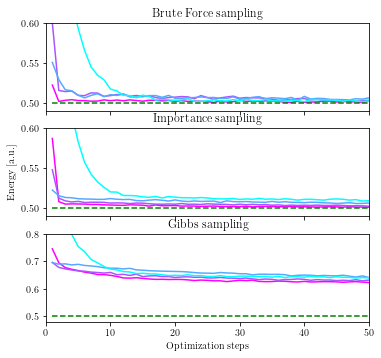

In [5]:
nh = nh_10
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy


c = np.array([2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", 4)
norm = mpl.colors.SymLogNorm(linthresh=0.01,vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0
for i in range(2,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])

ax1.set_ylim([0.49,0.6])
ax2.set_ylim([0.49,0.6])
ax3.set_ylim([0.48,0.8])

#fig.text(0.872,0.1,r'$\eta$')
#coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
#coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
#coloriarobaro.update_ticks()

plt.savefig(data_path('nh_10_first50.pgf'))
plt.show()

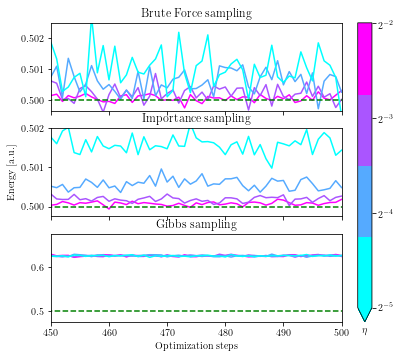

In [6]:
nh = nh_10
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", 4)
norm = mpl.colors.SymLogNorm(linthresh=0.01,vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(2,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([450,500])
ax2.set_xlim([450,500])
ax3.set_xlim([450,500])

low_limit1  = 0.9993*correct_energy
high_limit1 = 1.005*correct_energy

low_limit2  = 0.9995*correct_energy
high_limit2 = 1.004*correct_energy

low_limit3  = 0.95*correct_energy
high_limit3 = 1.35*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.865,r'$2^{-2}$')
fig.text(0.91,0.627,r'$2^{-3}$')
fig.text(0.91,0.387,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#Remove label and add them in log2 scale by ourself. 
for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)

plt.savefig(data_path('nh_10_last50.pgf'))

plt.show()

### 20 hidden nodes

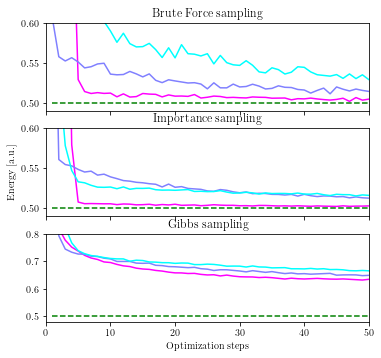

In [7]:
nh = nh_20
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy


c = np.array([2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", len(c))
norm = mpl.colors.SymLogNorm(linthresh=0.01,vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0
for i in range(3,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])

ax1.set_ylim([0.49,0.6])
ax2.set_ylim([0.49,0.6])
ax3.set_ylim([0.48,0.8])

#fig.text(0.872,0.095,r'$\eta$')
#fig.text(0.91,0.865,r'$2^{-3}$')
#fig.text(0.91,0.387,r'$2^{-4}$')
#fig.text(0.91,0.152,r'$2^{-5}$')


#coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
#coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
#coloriarobaro.update_ticks()




plt.savefig(data_path('nh_20_first50.pgf'))
plt.show()

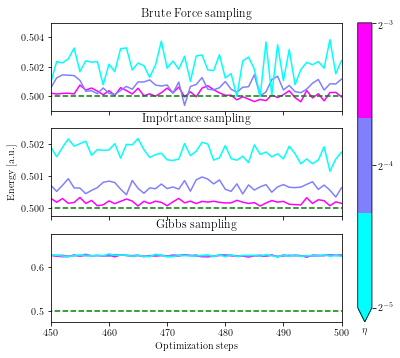

In [8]:
nh = nh_20
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy

c = np.array([2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("cool", len(c))
norm = mpl.colors.SymLogNorm(linthresh=0.01,vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(3,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([450,500])
ax2.set_xlim([450,500])
ax3.set_xlim([450,500])

low_limit1  = 0.998*correct_energy
high_limit1 = 1.01*correct_energy

low_limit2  = 0.9995*correct_energy
high_limit2 = 1.005*correct_energy

low_limit3  = 0.95*correct_energy
high_limit3 = 1.35*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')
fig.text(0.91,0.865,r'$2^{-3}$')
fig.text(0.91,0.509,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)
plt.savefig(data_path('nh_20_last50.pgf'))

plt.show()

From these plots it is very clear that the general trend is slower convergence with increasing number of hidden layers and decreasing learning rate.

In addition we see that Gibbs sampling does not achieve the same accuracy as Brute Force or Importance sampling, and its accuracy seems to be independent on either learning rate nor number of hidden layers. We'll need to investigate a bit further before we are sure.

## Combining the best learning values and number of hidden layers to find the best and optimal parameters.

Here we will try to plot the different values of hidden nodes against each other, to see if there is something the plots before this is section is hiding some information. 

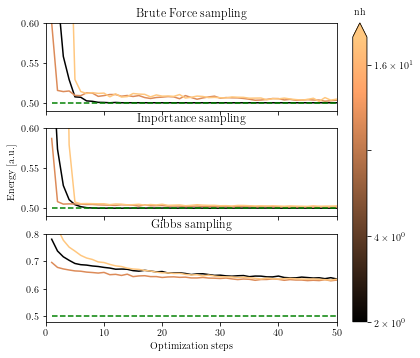

In [9]:
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy


c = np.array([2,10,20])

cmap = plt.cm.get_cmap("copper")
norm = mpl.colors.SymLogNorm(linthresh=0.5,vmin=c[0], vmax=c[-1])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0

ax1.plot(nh_2['BF_eta2']['Iteration'],nh_2['BF_eta2']['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
ax2.plot(nh_2['IS_eta2']['Iteration'],nh_2['IS_eta2']['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
ax2.plot(nh_10['IS_eta2']['Iteration'],nh_10['IS_eta2']['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])


for i in range(3,4):
    #ax1.plot(nh_2['BF_eta'+str(i)]['Iteration'],nh_2['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax1.plot(nh_10['BF_eta'+str(i)]['Iteration'],nh_10['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax1.plot(nh_20['BF_eta'+str(i)]['Iteration'],nh_20['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+2])))#, color = color[j])

    #ax2.plot(nh_2['IS_eta'+str(i)]['Iteration'],nh_2['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    #ax2.plot(nh_10['IS_eta'+str(i)]['Iteration'],nh_10['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax2.plot(nh_20['IS_eta'+str(i)]['Iteration'],nh_20['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j+2])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])

    ax3.plot(nh_2['GI_eta'+str(i)]['Iteration'],nh_2['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax3.plot(nh_10['GI_eta'+str(i)]['Iteration'],nh_10['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax3.plot(nh_20['GI_eta'+str(i)]['Iteration'],nh_20['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j+2])))#, color = color[j])
    
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])

ax1.set_ylim([0.49,0.6])
ax2.set_ylim([0.49,0.6])
ax3.set_ylim([0.48,0.8])
fig.text(0.864,0.9,'nh')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='max')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('nh_against_eachother_first50.pgf'))
plt.show()

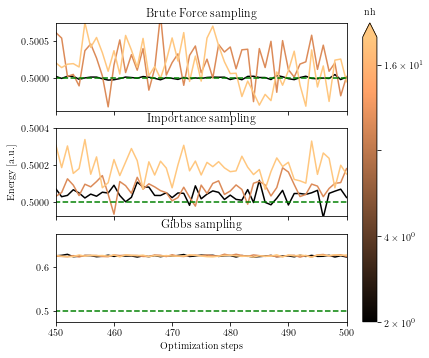

In [10]:
correct_energy = 0.5

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy

c = np.array([2,10,20])

cmap = plt.cm.get_cmap("copper")
norm = mpl.colors.SymLogNorm(linthresh=0.01,vmin=c[0], vmax=c[-1])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0

#ax1.plot(nh_2['BF_eta2']['Iteration'],nh_2['BF_eta2']['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
ax2.plot(nh_2['IS_eta2']['Iteration'],nh_2['IS_eta2']['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
ax2.plot(nh_10['IS_eta2']['Iteration'],nh_10['IS_eta2']['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])

for i in range(3,4):        
    #Best result is not with eta=2^-3 for IS.
    ax1.plot(nh_2['BF_eta'+str(i)]['Iteration'],nh_2['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax1.plot(nh_10['BF_eta'+str(i)]['Iteration'],nh_10['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax1.plot(nh_20['BF_eta'+str(i)]['Iteration'],nh_20['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+2])))#, color = color[j])

    #Best result is not with eta=2^-3 for IS.
    #ax2.plot(nh_2['IS_eta'+str(i)]['Iteration'],nh_2['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    #ax2.plot(nh_10['IS_eta'+str(i)]['Iteration'],nh_10['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax2.plot(nh_20['IS_eta'+str(i)]['Iteration'],nh_20['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j+2])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])

    ax3.plot(nh_2['GI_eta'+str(i)]['Iteration'],nh_2['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax3.plot(nh_10['GI_eta'+str(i)]['Iteration'],nh_10['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax3.plot(nh_20['GI_eta'+str(i)]['Iteration'],nh_20['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j+2])))#, color = color[j])
    
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([450,500])
ax2.set_xlim([450,500])
ax3.set_xlim([450,500])

low_limit1  = 0.9991*correct_energy
high_limit1 = 1.0015*correct_energy

low_limit2  = 0.99985*correct_energy
high_limit2 = 1.0008*correct_energy

low_limit3  = 0.95*correct_energy
high_limit3 = 1.35*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.864,0.9,'nh')

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='max')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('nh_against_eachother_last50.pgf'))

plt.show()

### Mean energies of last x iterations

In [11]:
last_optimization_iterations = 100
measurement = np.std #choose std or mean

def mean_energies_optimization(last_opt, analysis):
    mean_values = pd.DataFrame({})
    BF_2     = []
    BF_10    = []
    BF_20    = []

    IS_2     = []
    IS_10    = []
    IS_20    = []

    GI_2     = []
    GI_10    = []
    GI_20    = []

    i=1
    BF_2.append(analysis(nh_2['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_10.append(np.nan)
    BF_20.append(np.nan)
    
    IS_2.append(analysis(nh_2['IS_eta'+str(i)]['Energy'][-last_opt:]))      
    IS_10.append(np.nan)
    IS_20.append(np.nan)

    GI_2.append(analysis(nh_2['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_10.append(np.nan)
    GI_20.append(np.nan)

    i=2
    BF_2.append(analysis(nh_2['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_10.append(analysis(nh_10['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_20.append(np.nan)
    
    IS_2.append(analysis(nh_2['IS_eta'+str(i)]['Energy'][-last_opt:]))      
    IS_10.append(analysis(nh_10['IS_eta'+str(i)]['Energy'][-last_opt:]))
    IS_20.append(np.nan)

    GI_2.append(analysis(nh_2['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_10.append(analysis(nh_10['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_20.append(np.nan)

    for i in range(3,6):
        BF_2.append( analysis(nh_2 ['BF_eta'+str(i)]['Energy'][-last_opt:]))
        BF_10.append(analysis(nh_10['BF_eta'+str(i)]['Energy'][-last_opt:]))
        BF_20.append(analysis(nh_20['BF_eta'+str(i)]['Energy'][-last_opt:]))
    
        IS_2.append( analysis(nh_2 ['IS_eta'+str(i)]['Energy'][-last_opt:]))      
        IS_10.append(analysis(nh_10['IS_eta'+str(i)]['Energy'][-last_opt:]))
        IS_20.append(analysis(nh_20['IS_eta'+str(i)]['Energy'][-last_opt:]))

        GI_2.append( analysis(nh_2 ['GI_eta'+str(i)]['Energy'][-last_opt:]))
        GI_10.append(analysis(nh_10['GI_eta'+str(i)]['Energy'][-last_opt:]))
        GI_20.append(analysis(nh_20['GI_eta'+str(i)]['Energy'][-last_opt:]))

    mean_values['Learning rate eta'] = [2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)]
    mean_values['BF_nh2']  =  BF_2
    mean_values['BF_nh10'] =  BF_10
    mean_values['BF_nh20'] =  BF_20

    mean_values['IS_nh2']  =  IS_2
    mean_values['IS_nh10'] =  IS_10
    mean_values['IS_nh20'] =  IS_20

    mean_values['GI_nh2']  =  GI_2
    mean_values['GI_nh10'] =  GI_10
    mean_values['GI_nh20'] =  GI_20
    return mean_values


for i in [50,100,200]:
    mean_values = mean_energies_optimization(i, measurement)
    print('Lowest value found in:\n', (mean_values.loc[:, mean_values.columns != 'Learning rate eta']).min())
    print('mean energy from last ', i, ' optimization iterations.')
    display(mean_values)


Lowest value found in:
 BF_nh2     0.000014
BF_nh10    0.000109
BF_nh20    0.000283
IS_nh2     0.000016
IS_nh10    0.000048
IS_nh20    0.000065
GI_nh2     0.001225
GI_nh10    0.001422
GI_nh20    0.001244
dtype: float64
mean energy from last  50  optimization iterations.


,Learning rate eta,BF_nh2,BF_nh10,BF_nh20,IS_nh2,IS_nh10,IS_nh20,GI_nh2,GI_nh10,GI_nh20
0,0.50000,0.000097,NaN,NaN,0.000037,NaN,NaN,0.001225,NaN,NaN
1,0.25000,0.000014,0.000109,NaN,0.000034,0.000048,NaN,0.001547,0.001549,NaN
2,0.12500,0.000017,0.000251,0.000283,0.000061,0.000066,0.000065,0.001450,0.001634,0.001483
3,0.06250,0.000259,0.000378,0.000435,0.000016,0.000132,0.000141,0.001301,0.001518,0.001244
4,0.03125,0.000141,0.000600,0.000901,0.000108,0.000219,0.000229,0.001411,0.001422,0.001532


Lowest value found in:
 BF_nh2     0.000014
BF_nh10    0.000124
BF_nh20    0.000268
IS_nh2     0.000016
IS_nh10    0.000048
IS_nh20    0.000071
GI_nh2     0.001270
GI_nh10    0.001341
GI_nh20    0.001368
dtype: float64
mean energy from last  100  optimization iterations.


,Learning rate eta,BF_nh2,BF_nh10,BF_nh20,IS_nh2,IS_nh10,IS_nh20,GI_nh2,GI_nh10,GI_nh20
0,0.50000,0.000109,NaN,NaN,0.000036,NaN,NaN,0.001270,NaN,NaN
1,0.25000,0.000014,0.000124,NaN,0.000034,0.000048,NaN,0.001615,0.001603,NaN
2,0.12500,0.000017,0.000248,0.000268,0.000061,0.000075,0.000071,0.001626,0.001572,0.001482
3,0.06250,0.000262,0.000440,0.000416,0.000016,0.000146,0.000169,0.001306,0.001441,0.001423
4,0.03125,0.000166,0.000596,0.000950,0.000100,0.000257,0.000302,0.001358,0.001341,0.001368


Lowest value found in:
 BF_nh2     0.000015
BF_nh10    0.000157
BF_nh20    0.000310
IS_nh2     0.000015
IS_nh10    0.000057
IS_nh20    0.000103
GI_nh2     0.001292
GI_nh10    0.001344
GI_nh20    0.001356
dtype: float64
mean energy from last  200  optimization iterations.


,Learning rate eta,BF_nh2,BF_nh10,BF_nh20,IS_nh2,IS_nh10,IS_nh20,GI_nh2,GI_nh10,GI_nh20
0,0.50000,0.000131,NaN,NaN,0.000044,NaN,NaN,0.001292,NaN,NaN
1,0.25000,0.000015,0.000157,NaN,0.000039,0.000057,NaN,0.001566,0.001434,NaN
2,0.12500,0.000017,0.000273,0.000310,0.000077,0.000094,0.000103,0.001467,0.001455,0.001431
3,0.06250,0.000277,0.000487,0.000529,0.000015,0.000218,0.000269,0.001312,0.001510,0.001394
4,0.03125,0.000167,0.000591,0.001102,0.000112,0.000448,0.000518,0.001479,0.001344,0.001356


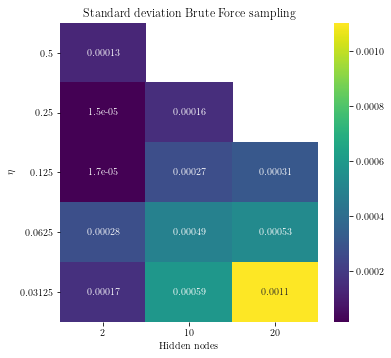

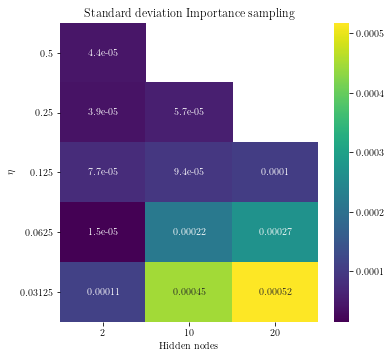

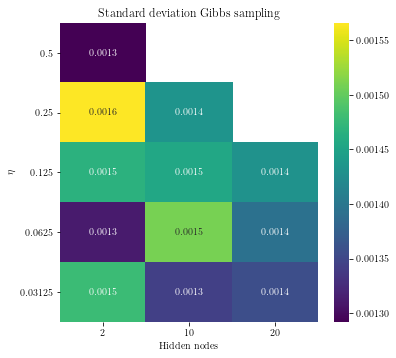

In [12]:
nh = np.array([2, 10, 20])
eta = np.array([2**(-1), 2**(-2), 2**(-3), 2**(-4), 2**(-5)])
mean_values['eta'] = eta

htmap_bf = np.zeros((5, 3)) 
htmap_is = np.zeros((5, 3)) 
htmap_gi = np.zeros((5, 3)) 
for i,j in enumerate([2,10,20]):
    htmap_bf[:,i] = mean_values['BF_nh'+str(j)]
    htmap_is[:,i] = mean_values['IS_nh'+str(j)]
    htmap_gi[:,i] = mean_values['GI_nh'+str(j)]

def plot_heatmap(x,y, data, title, savefigname):
    # plot
    fig, ax = plt.subplots()
    w = 5.78851          # Latex document text width
    fig.set_size_inches(w=w*1.0,h= 5.5)

    sns.heatmap(data, annot=True, ax=ax, cmap='viridis')
    ax.set_xticklabels(x, rotation=0)
    ax.set_yticklabels(y, rotation=0)
    ax.set_title(title)
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("Hidden nodes")
    plt.savefig(data_path(savefigname))
    
#sns.set(font_scale=1.4)
plot_heatmap(nh,eta, htmap_bf, 'Standard deviation Brute Force sampling', 'bf_heatmap.pdf')
plt.show()

plot_heatmap(nh,eta, htmap_is, 'Standard deviation Importance sampling', 'is_heatmap.pdf')
plt.show()

plot_heatmap(nh,eta, htmap_gi, 'Standard deviation Gibbs sampling', 'gi_heatmap.pdf')
plt.show()

### Gibbs - Choosing correct sigma. 

As we have seen above, Gibbs sampling does not appeal after changing number of hidden nodes nor $\eta$, thus we shall try another tweek of parameter, namely $\sigma$. We will use the learning rate $\eta=2^{-1}$ with two hidden nodes for this, together with $2^{20}$ MC cycles.

In [13]:
gi_sigma = {}

print("Loading files...")

gi_sigma['sigma_25'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-1_nh_2_nx_1MC_2^20sigma_0.250000.dat"))
gi_sigma['sigma_50'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-1_nh_2_nx_1MC_2^20sigma_0.500000.dat"))
gi_sigma['sigma_75'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-1_nh_2_nx_1MC_2^20sigma_0.750000.dat"))
gi_sigma['sigma_100'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-1_nh_2_nx_1MC_2^20sigma_1.000000.dat"))
gi_sigma['sigma_125'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-1_nh_2_nx_1MC_2^20sigma_1.250000.dat"))

print("Loading completed")

Loading files...
Loading completed


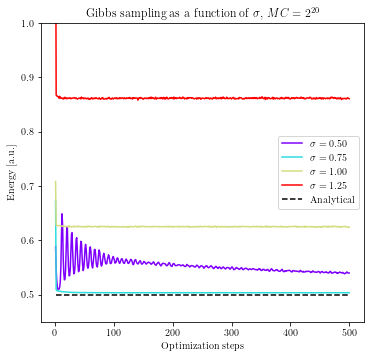

In [14]:
correct_energy = 0.5
sigmas = np.array([0.5,0.75,1.0, 1.25])

# plot
fig, ax1 = plt.subplots(1,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("rainbow")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

#print(cmap)
ax1.plot(gi_sigma['sigma_50']['Iteration'], gi_sigma['sigma_50']['Energy'], label=r'$\sigma=0.50$',color=cmap(norm(sigmas[0])))
ax1.plot(gi_sigma['sigma_75']['Iteration'], gi_sigma['sigma_75']['Energy'],  label=r'$\sigma=0.75$', color=cmap(norm(sigmas[1])))
ax1.plot(gi_sigma['sigma_100']['Iteration'], gi_sigma['sigma_100']['Energy'], label=r'$\sigma=1.00$', color=cmap(norm(sigmas[2])))
ax1.plot(gi_sigma['sigma_125']['Iteration'], gi_sigma['sigma_125']['Energy'],label=r'$\sigma=1.25$', color=cmap(norm(sigmas[3])))

yExact = np.ones(len(gi_sigma['sigma_75']['Iteration']))*correct_energy
ax1.plot(gi_sigma['sigma_75']['Iteration'],yExact,'--',color='Black', label='Analytical')
ax1.legend(loc='best')

ax1.set_ylim([0.45,1.0])
ax1.set_ylabel("Energy [a.u.]")
ax1.set_xlabel("Optimization steps")
ax1.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')

plt.savefig(data_path('gi_sigma.pgf'))

plt.show()

As seen in the figures above, it is clear that choosing a high learning parameter will lead to both faster convergence and higher accuracy. 

# Statistical analysis of non-interacting case on best parameters.

## Blocking

Here we use the blocking method, which is the same statistical method we used in last project. We will be using the best parameters for each sampling method from the previous analysis, which includes 
- Brute Force sampling: $\eta=2^{-2}$ and $N=2$.
- Importance sampling: $\eta=2^{-4}$ and $N=2$.
- Gibbs sampling: $\eta=2^{-2}$ and $N=2$.

In [15]:
best_param = {}

print("Loading files...")

best_param['bf'] = pd.read_fwf(data_path("Brute_Force/E_eta_2^-2_nh_2_nx_1MC_2^20.dat"))
best_param['is'] = pd.read_fwf(data_path("Importance_Sampling/E_eta_2^-4_nh_2_nx_1MC_2^20.dat"))
best_param['gi'] = pd.read_fwf(data_path("Gibbs/E_eta_2^-2_nh_2_nx_1MC_2^20sigma_0.750000.dat"))

best_param['bf_block'] = pd.read_fwf(data_path("Statistical_Analysis/BF_eta_2^-2_nh_2_nx_1MC_2^20.dat"))
best_param['is_block'] = pd.read_fwf(data_path("Statistical_Analysis/IS_eta_2^-4_nh_2_nx_1MC_2^20.dat"))
best_param['gi_block'] = pd.read_fwf(data_path("Statistical_Analysis/GI_eta_2^-2_nh_2_nx_1MC_2^20sigma_0.750000.dat"))

print("Loading completed")

Loading files...
Loading completed


How does the data look?

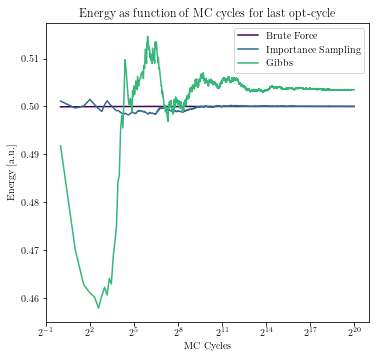

In [16]:
# plot
fig, ax1 = plt.subplots(1,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

x = np.linspace(1,len(best_param['bf_block']['Energy']),len(best_param['bf_block']['Energy']))
#print(cmap)
ax1.plot(x, best_param['bf_block']['Energy'], label='Brute Force',color=cmap(norm(sigmas[0])))
ax1.plot(x, best_param['is_block']['Energy'], label='Importance Sampling', color=cmap(norm(sigmas[1])))
ax1.plot(x, best_param['gi_block']['Energy'], label='Gibbs', color=cmap(norm(sigmas[2])))
ax1.set_title('Energy as function of MC cycles for last opt-cycle')
ax1.set_xlabel('MC Cycles')
ax1.set_xscale('log', basex=2)
ax1.set_ylabel('Energy [a.u.]')
ax1.legend(loc='best')
#plt.savefig(data_path('best_param_mc.pgf'))
plt.show()

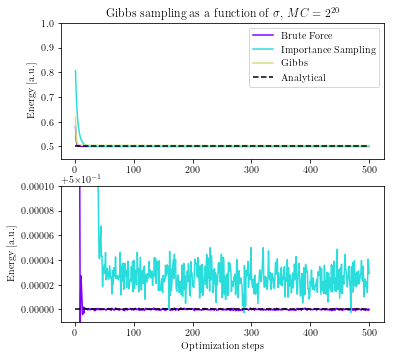

In [17]:
correct_energy = 0.5
# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("rainbow")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

#print(cmap)
ax1.plot(best_param['bf']['Iteration'], best_param['bf']['Energy'], label='Brute Force',color=cmap(norm(sigmas[0])))
ax1.plot(best_param['bf']['Iteration'], best_param['is']['Energy'], label='Importance Sampling', color=cmap(norm(sigmas[1])))
ax1.plot(best_param['bf']['Iteration'], best_param['gi']['Energy'], label='Gibbs', color=cmap(norm(sigmas[2])))

yExact = np.ones(len(best_param['bf']['Iteration']))*correct_energy
ax1.plot(best_param['bf']['Iteration'],yExact,'--',color='Black', label='Analytical')
ax1.legend(loc='best')

ax1.set_ylim([0.45,1.0])
ax1.set_ylabel("Energy [a.u.]")
#ax1.set_xlabel("Optimization steps")
ax1.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')

#print(cmap)
ax2.plot(best_param['bf']['Iteration'], best_param['bf']['Energy'], label='Brute Force',color=cmap(norm(sigmas[0])))
ax2.plot(best_param['bf']['Iteration'], best_param['is']['Energy'], label='Importance Sampling', color=cmap(norm(sigmas[1])))
ax2.plot(best_param['bf']['Iteration'], best_param['gi']['Energy'], label='Gibbs', color=cmap(norm(sigmas[2])))

yExact = np.ones(len(best_param['bf']['Iteration']))*correct_energy
ax2.plot(best_param['bf']['Iteration'],yExact,'--',color='Black', label='Analytical')
#ax2.legend(loc='best')

ax2.set_ylim([0.49999,0.5001])
ax2.set_ylabel("Energy [a.u.]")
ax2.set_xlabel("Optimization steps")
#ax2.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')


#plt.savefig(data_path('best_param_opt.pgf'))

plt.show()

In [18]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x):
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0::2] + x[1::2])

    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

     # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)

First off, we will be looking at the non-interacting case with $2^{20}$ number of MC-cycles. This is the last resulting Monte Carlo run after 500 optimization steps. 

In [19]:

def use_blocking(filename, kwargs):
    frame = {}
    mean_list = []
    std_list = []
    var_list = []
    infile = open(data_path(filename),'r')
    infile.readline()
    data = np.loadtxt(infile)
    data = data[0:]
    (mean, var) = block(data)
    std = np.sqrt(var)
    mean_list.append(mean)
    std_list.append(std)
    var_list.append(var)
    
    frame['Particles'] = kwargs
    frame['Dimensions'] = kwargs
    frame['Mean block'] = mean_list
    frame['Variance block'] = var_list
    frame['STD block'] = std_list
    frame = pd.DataFrame(frame)
    return frame

print('Brute Force sampling:')
bf_block = use_blocking("Statistical_Analysis/BF_eta_2^-2_nh_2_nx_1MC_2^20.dat",1)
print(bf_block)
print('Importance sampling:')
is_block = use_blocking("Statistical_Analysis/IS_eta_2^-4_nh_2_nx_1MC_2^20.dat",1)
print(is_block)
print('Gibbs sampling:')
gi_block = use_blocking("Statistical_Analysis/GI_eta_2^-2_nh_2_nx_1MC_2^20sigma_0.750000.dat",1)
print(gi_block)


Brute Force sampling:
   Particles  Dimensions  Mean block  Variance block     STD block
0          1           1         0.5    6.749370e-15  8.215455e-08
Importance sampling:
   Particles  Dimensions  Mean block  Variance block  STD block
0          1           1     0.50004    4.994924e-12   0.000002
Gibbs sampling:
   Particles  Dimensions  Mean block  Variance block  STD block
0          1           1    0.503539    3.772225e-10   0.000019


# Interacting case 2 particles 2 dimensions

In [20]:
I_nh_2 = {}
I_nh_5 = {}
I_nh_10 = {}
I_nh_20 = {}
print("Loading files...")
for i in range(1,6):
    I_nh_2['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/I_E_eta_2^-"        +str(i) + "_nh_2_nx_4MC_2^17.dat"))
    I_nh_2['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/I_E_eta_2^-"+str(i) + "_nh_2_nx_4MC_2^17.dat"))
    I_nh_2['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-"              +str(i) + "_nh_2_nx_4MC_2^17.dat"))

for i in range(1,6):
    I_nh_5['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/I_E_eta_2^-"        +str(i) + "_nh_5_nx_4MC_2^17.dat"))
    I_nh_5['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/I_E_eta_2^-"+str(i) + "_nh_5_nx_4MC_2^17.dat"))
    I_nh_5['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-"              +str(i) + "_nh_5_nx_4MC_2^17.dat"))

for i in range(2,6):
    I_nh_10['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/I_E_eta_2^-"        +str(i) + "_nh_10_nx_4MC_2^17.dat"))
    I_nh_10['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/I_E_eta_2^-"+str(i) + "_nh_10_nx_4MC_2^17.dat"))
    I_nh_10['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-"              +str(i) + "_nh_10_nx_4MC_2^17.dat"))

for i in range(3,6):
    I_nh_20['BF_eta' + str(i)] = pd.read_fwf(data_path("Brute_Force/I_E_eta_2^-"        +str(i) + "_nh_20_nx_4MC_2^17.dat"))
    I_nh_20['IS_eta' + str(i)] = pd.read_fwf(data_path("Importance_Sampling/I_E_eta_2^-"+str(i) + "_nh_20_nx_4MC_2^17.dat"))
    I_nh_20['GI_eta' + str(i)] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-"              +str(i) + "_nh_20_nx_4MC_2^17.dat"))
print("Loading completed")

Loading files...
Loading completed


# 2 hidden nodes

In a similar and fashionable trend as a above, we will start off with trying to find the best parameters by visualization. The number of Monte Carlo cycles is $2^17$ here as well (excluding equilibratio fraction), and learning rates is ranging from $2^{-2}$ to $2^{-5}$. 

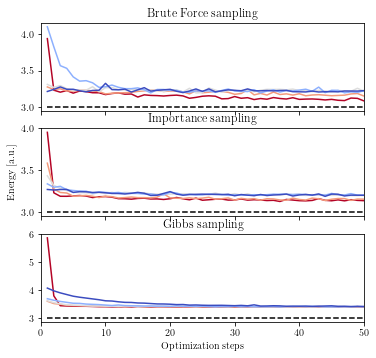

In [21]:

nh = I_nh_2
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy


c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])
"""
ax1.set_ylim([0.49,0.6])
ax2.set_ylim([0.49,0.6])
ax3.set_ylim([0.48,0.8])
ax2.text(56.5, 0.55, '$\eta$',rotation=0)
"""
#fig.text(0.912,0.87,r'$5.0 \times 10^{-1}$')
#fig.text(0.872,0.1,r'$\eta$')
#coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
#coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
#coloriarobaro.update_ticks()

#plt.savefig(data_path('I_nh_2_first50.pgf'))
plt.show()

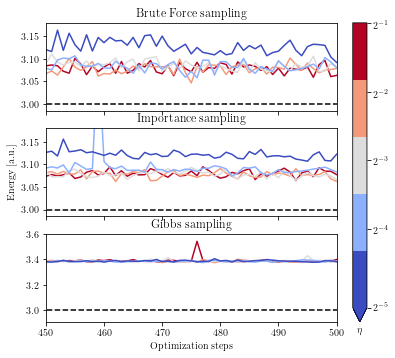

In [22]:

nh = I_nh_2
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax1.set_xlim([450,500])
ax2.set_xlim([450,500])
ax3.set_xlim([450,500])


low_limit1  = 0.995*correct_energy
high_limit1 = 1.06*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.06*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.2*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.865,r'$2^{-1}$')
fig.text(0.91,0.692,r'$2^{-2}$')
fig.text(0.91,0.523,r'$2^{-3}$')
fig.text(0.91,0.348,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)

#plt.savefig(data_path('I_nh_2_last50.pgf'))

plt.show()

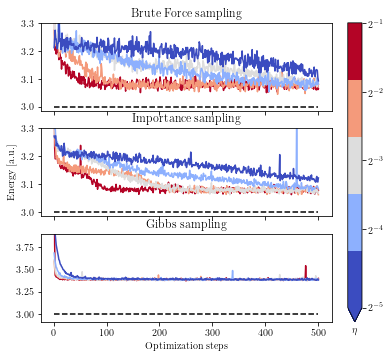

In [23]:

nh = I_nh_2
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.3*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.867,r'$2^{-1}$')
fig.text(0.91,0.694,r'$2^{-2}$')
fig.text(0.91,0.523,r'$2^{-3}$')
fig.text(0.91,0.348,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)

plt.savefig(data_path('I_nh_2_all500.pgf'))

plt.show()

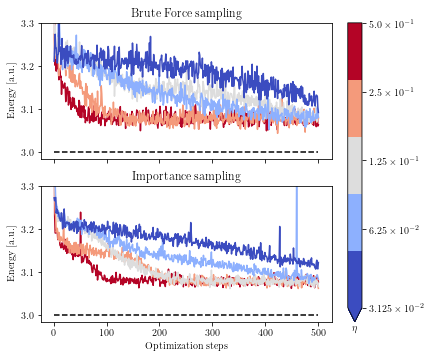

In [24]:
nh = I_nh_2
correct_energy = 3.0

# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')  
ax1.set_ylabel("Energy [a.u.]")


ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax2.set_xlabel("Optimization steps")

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy


ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2), shrink=1.0, fraction=0.05,extend='min')
fig.text(0.912,0.87,r'$5.0 \times 10^{-1}$')
fig.text(0.872,0.1,r'$\eta$')

coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('I_nh_2_all500_GI_IS.pgf'))

plt.show()

## 5 Hidden nodes

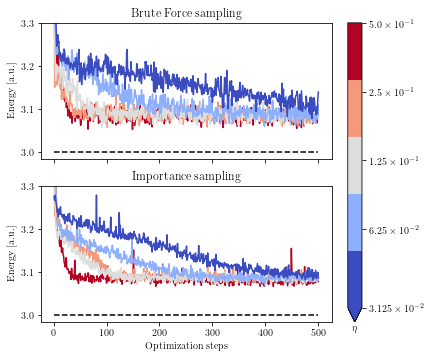

In [25]:
nh = I_nh_5
correct_energy = 3.0

# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')  
ax1.set_ylabel("Energy [a.u.]")


ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax2.set_xlabel("Optimization steps")

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy


ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2), shrink=1.0, fraction=0.05,extend='min')
fig.text(0.912,0.87,r'$5.0 \times 10^{-1}$')
fig.text(0.872,0.1,r'$\eta$')

coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('I_nh_5_all500.pgf'))

plt.show()

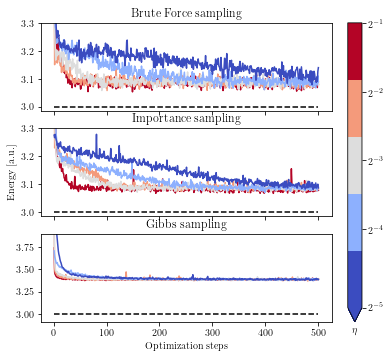

In [26]:
nh = I_nh_5
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(1,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta1']['Iteration'], yExact, '--', color = 'black')

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.3*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])


fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.867,r'$2^{-1}$')
fig.text(0.91,0.694,r'$2^{-2}$')
fig.text(0.91,0.523,r'$2^{-3}$')
fig.text(0.91,0.348,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)

plt.savefig(data_path('I_nh_5_all500.pgf'))
plt.show()

## 10 Hidden nodes

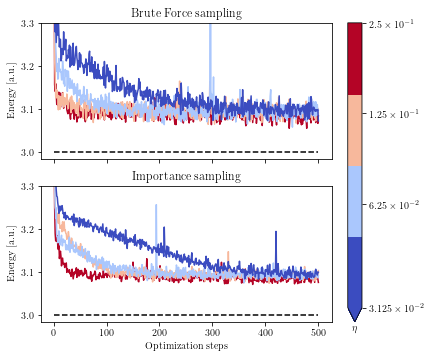

In [27]:
nh = I_nh_10
correct_energy = 3.0

# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(2,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta2']['Iteration'], yExact, '--', color = 'black')  
ax1.set_ylabel("Energy [a.u.]")


ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta2']['Iteration'], yExact, '--', color = 'black')

ax2.set_xlabel("Optimization steps")

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy


ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2), shrink=1.0, fraction=0.05,extend='min')
fig.text(0.872,0.1,r'$\eta$')

coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('I_nh_10_all500.pgf'))

plt.show()

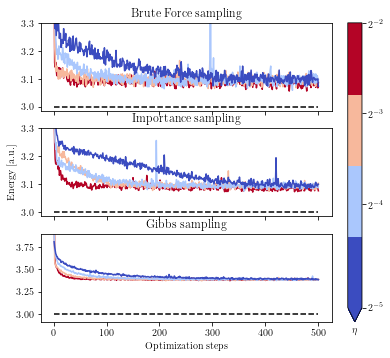

In [28]:

nh = I_nh_10
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta2']['Iteration']))*correct_energy

c = np.array([2**(-2),2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(2,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta2']['Iteration'], yExact, '--', color = 'black')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta2']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta2']['Iteration'], yExact, '--', color = 'black')

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.3*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')

fig.text(0.91,0.867,r'$2^{-2}$')
fig.text(0.91,0.640,r'$2^{-3}$')
fig.text(0.91,0.410,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#Remove label and add them in log2 scale by ourself. 
for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)
plt.savefig(data_path('I_nh_10_all500.pgf'))

plt.show()

## 20 Hidden nodes

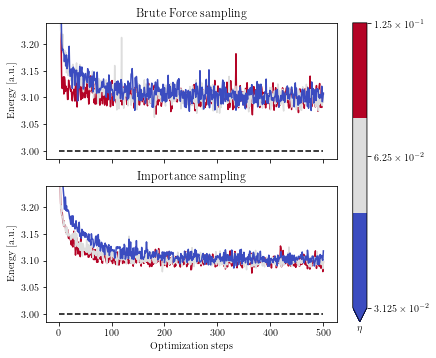

In [29]:
nh = I_nh_20
correct_energy = 3.0

# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy

c = np.array([2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(3,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'black')  
ax1.set_ylabel("Energy [a.u.]")


ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'black')

ax2.set_xlabel("Optimization steps")

low_limit1  = 0.995*correct_energy
high_limit1 = 1.08*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.08*correct_energy


ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2), shrink=1.0, fraction=0.05,extend='min')
#fig.text(0.912,0.87,r'$5.0 \times 10^{-1}$')
fig.text(0.872,0.1,r'$\eta$')

coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('I_nh_20_all500.pgf'))

plt.show()

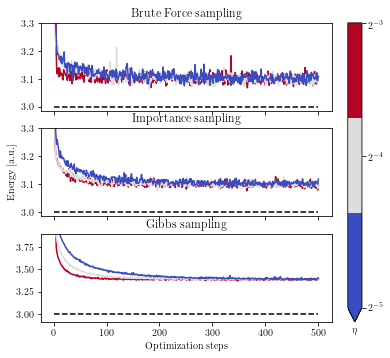

In [30]:
nh = I_nh_20
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(nh['BF_eta3']['Iteration']))*correct_energy

c = np.array([2**(-3),2**(-4),2**(-5)])

cmap = plt.cm.get_cmap("coolwarm", len(c))
norm = mpl.colors.SymLogNorm(linthresh=2**(-4),vmin=c[-1], vmax=c[0])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#color = ['b','y','g']
j=0
for i in range(3,6):
    ax1.plot(nh['BF_eta'+str(i)]['Iteration'],nh['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax2.plot(nh['IS_eta'+str(i)]['Iteration'],nh['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax3.plot(nh['GI_eta'+str(i)]['Iteration'],nh['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    j+=1
    
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'black')  

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'black')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh['BF_eta3']['Iteration'], yExact, '--', color = 'black')

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.3*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])

fig.text(0.872,0.095,r'$\eta$')
fig.text(0.91,0.866,r'$2^{-3}$')
fig.text(0.91,0.531,r'$2^{-4}$')
fig.text(0.91,0.152,r'$2^{-5}$')

coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='min')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

for label in coloriarobaro.ax.yaxis.get_ticklabels()[:]:
    label.set_visible(False)

plt.savefig(data_path('I_nh_20_all500.pgf'))
plt.show()

## Best parameters

In [31]:
last_optimization_iterations = 100
measurement = np.std #choose std or mean

def mean_energies_optimization(last_opt, analysis):
    mean_values = pd.DataFrame({})
    BF_2     = []
    BF_5    = []
    BF_10    = []
    BF_20    = []

    IS_2     = []
    IS_5     = []
    IS_10    = []
    IS_20    = []

    GI_2     = []
    GI_5     = []
    GI_10    = []
    GI_20    = []

    i=1
    BF_2.append(analysis(I_nh_2['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_5.append(analysis(I_nh_5['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_10.append(np.nan)
    BF_20.append(np.nan)
    
    IS_2.append(analysis(I_nh_2['IS_eta'+str(i)]['Energy'][-last_opt:])) 
    IS_5.append(analysis(I_nh_5['IS_eta'+str(i)]['Energy'][-last_opt:]))      
    IS_10.append(np.nan)
    IS_20.append(np.nan)

    GI_2.append(analysis(I_nh_2['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_5.append(analysis(I_nh_5['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_10.append(np.nan)
    GI_20.append(np.nan)

    i=2
    BF_2.append(analysis(I_nh_2['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_5.append(analysis(I_nh_5['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_10.append(analysis(I_nh_10['BF_eta'+str(i)]['Energy'][-last_opt:]))
    BF_20.append(np.nan)
    
    IS_2.append(analysis(I_nh_2['IS_eta'+str(i)]['Energy'][-last_opt:]))      
    IS_5.append(analysis(I_nh_5['IS_eta'+str(i)]['Energy'][-last_opt:]))      
    IS_10.append(analysis(I_nh_10['IS_eta'+str(i)]['Energy'][-last_opt:]))
    IS_20.append(np.nan)

    GI_2.append(analysis(I_nh_2['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_5.append(analysis(I_nh_5['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_10.append(analysis(I_nh_10['GI_eta'+str(i)]['Energy'][-last_opt:]))
    GI_20.append(np.nan)

    for i in range(3,6):
        BF_2.append( analysis(I_nh_2 ['BF_eta'+str(i)]['Energy'][-last_opt:]))
        BF_5.append( analysis(I_nh_5 ['BF_eta'+str(i)]['Energy'][-last_opt:]))
        BF_10.append(analysis(I_nh_10['BF_eta'+str(i)]['Energy'][-last_opt:]))
        BF_20.append(analysis(I_nh_20['BF_eta'+str(i)]['Energy'][-last_opt:]))
    
        IS_2.append( analysis(I_nh_2 ['IS_eta'+str(i)]['Energy'][-last_opt:]))      
        IS_5.append( analysis(I_nh_5 ['IS_eta'+str(i)]['Energy'][-last_opt:]))      
        IS_10.append(analysis(I_nh_10['IS_eta'+str(i)]['Energy'][-last_opt:]))
        IS_20.append(analysis(I_nh_20['IS_eta'+str(i)]['Energy'][-last_opt:]))

        GI_2.append( analysis(I_nh_2 ['GI_eta'+str(i)]['Energy'][-last_opt:]))
        GI_5.append( analysis(I_nh_5 ['GI_eta'+str(i)]['Energy'][-last_opt:]))
        GI_10.append(analysis(I_nh_10['GI_eta'+str(i)]['Energy'][-last_opt:]))
        GI_20.append(analysis(I_nh_20['GI_eta'+str(i)]['Energy'][-last_opt:]))

    mean_values['Learning rate eta'] = np.array([2**(-1),2**(-2),2**(-3),2**(-4),2**(-5)])
    mean_values['BF_nh2']  =  BF_2
    mean_values['BF_nh5']  =  BF_5
    mean_values['BF_nh10'] =  BF_10
    mean_values['BF_nh20'] =  BF_20

    mean_values['IS_nh2']  =  IS_2
    mean_values['IS_nh5']  =  IS_5
    mean_values['IS_nh10'] =  IS_10
    mean_values['IS_nh20'] =  IS_20

    mean_values['GI_nh2']  =  GI_2
    mean_values['GI_nh5']  =  GI_5
    mean_values['GI_nh10'] =  GI_10
    mean_values['GI_nh20'] =  GI_20
    mean_values.set_index('Learning rate eta')
    return mean_values


for i in [100]: #[50,100,200]
    I_mean_values = mean_energies_optimization(i, measurement)
    print('Lowest value found for:\n', (mean_values.loc[:, mean_values.columns != 'Learning rate eta']).min())
    print('mean energy from last ', i, ' optimization iterations.')
    display(I_mean_values)
    

Lowest value found for:
 BF_nh2     0.000015
BF_nh10    0.000157
BF_nh20    0.000310
IS_nh2     0.000015
IS_nh10    0.000057
IS_nh20    0.000103
GI_nh2     0.001292
GI_nh10    0.001344
GI_nh20    0.001356
eta        0.031250
dtype: float64
mean energy from last  100  optimization iterations.


,Learning rate eta,BF_nh2,BF_nh5,BF_nh10,BF_nh20,IS_nh2,IS_nh5,IS_nh10,IS_nh20,GI_nh2,GI_nh5,GI_nh10,GI_nh20
0,0.50000,0.010680,0.011384,NaN,NaN,0.007107,0.010383,NaN,NaN,0.016332,0.005228,NaN,NaN
1,0.25000,0.011220,0.010531,0.010996,NaN,0.007122,0.006881,0.005716,NaN,0.005383,0.007190,0.004924,NaN
2,0.12500,0.013096,0.011615,0.011234,0.012804,0.006195,0.006913,0.006559,0.008242,0.009059,0.006142,0.005734,0.005231
3,0.06250,0.012006,0.012615,0.014119,0.012301,0.026905,0.005929,0.007286,0.006558,0.004812,0.005916,0.005955,0.005271
4,0.03125,0.017367,0.015439,0.011593,0.010759,0.012112,0.007712,0.012170,0.006139,0.005408,0.005569,0.005339,0.007336


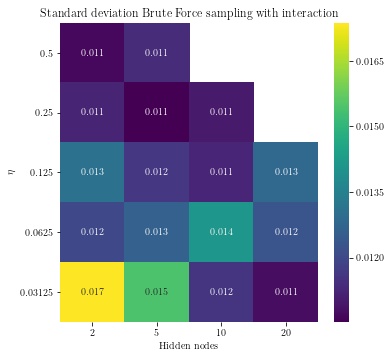

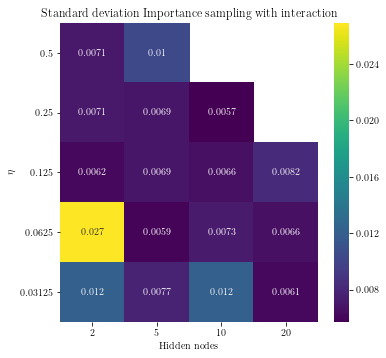

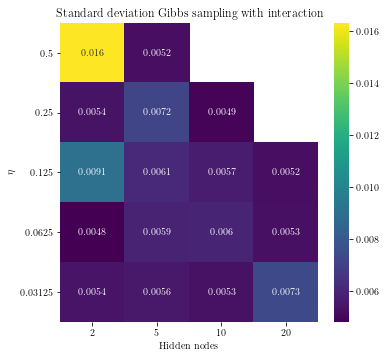

In [32]:
nh = np.array([2, 5, 10, 20])
eta = np.array([2**(-1), 2**(-2), 2**(-3), 2**(-4), 2**(-5)])

htmap_bf = np.zeros((5, len(nh))) 
htmap_is = np.zeros((5, len(nh))) 
htmap_gi = np.zeros((5, len(nh))) 
for i,j in enumerate(nh):
    htmap_bf[:,i] = I_mean_values['BF_nh'+str(j)]
    htmap_is[:,i] = I_mean_values['IS_nh'+str(j)]
    htmap_gi[:,i] = I_mean_values['GI_nh'+str(j)]

def I_plot_heatmap(x,y, data, title, savefigname):
    # plot
    fig, ax = plt.subplots()
    w = 5.78851          # Latex document text width
    fig.set_size_inches(w=w*1.0,h= 5.5)

    sns.heatmap(data, annot=True, ax=ax, cmap='viridis')
    ax.set_xticklabels(x, rotation=0)
    ax.set_yticklabels(y, rotation=0)
    ax.set_title(title)
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("Hidden nodes")
    plt.savefig(data_path(savefigname))
    
#sns.set(font_scale=1.4)
I_plot_heatmap(nh,eta, htmap_bf, 'Standard deviation Brute Force sampling with interaction', 'I_bf_heatmap.pdf')
plt.show()

I_plot_heatmap(nh,eta, htmap_is, 'Standard deviation Importance sampling with interaction', 'I_is_heatmap.pdf')
plt.show()

I_plot_heatmap(nh,eta, htmap_gi, 'Standard deviation Gibbs sampling with interaction', 'I_gi_heatmap.pdf')
plt.show()

## Gibbs - choosing correct sigma

Once again we see that changing learning value or number of hidden nodes does not contribute, and we will tweak its sigma instead. This is done with $MC=2^{20}$ and opt cycles $=500$. 

In [33]:
I_gi_sigma = {}

print("Loading files...")

I_gi_sigma['sigma_25'] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-3_nh_2_nx_4MC_2^20sigma_0.250000.dat"))
I_gi_sigma['sigma_50'] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-3_nh_2_nx_4MC_2^20sigma_0.500000.dat"))
I_gi_sigma['sigma_75'] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-3_nh_2_nx_4MC_2^20sigma_0.750000.dat"))
I_gi_sigma['sigma_100'] = I_nh_2['GI_eta2']
I_gi_sigma['sigma_125'] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-3_nh_2_nx_4MC_2^20sigma_1.250000.dat"))

print("Loading completed")

Loading files...
Loading completed


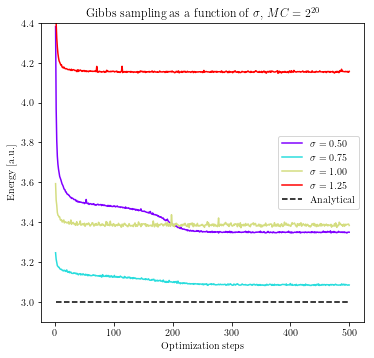

In [34]:
correct_energy = 3.0
sigmas = np.array([0.5,0.75,1.0, 1.25])

# plot
fig, ax1 = plt.subplots(1,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("rainbow")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

#print(cmap)
ax1.plot(I_gi_sigma['sigma_50']['Iteration'], I_gi_sigma['sigma_50']['Energy'], label=r'$\sigma=0.50$',color=cmap(norm(sigmas[0])))
ax1.plot(I_gi_sigma['sigma_75']['Iteration'], I_gi_sigma['sigma_75']['Energy'], label=r'$\sigma=0.75$', color=cmap(norm(sigmas[1])))
ax1.plot(I_gi_sigma['sigma_100']['Iteration'], I_gi_sigma['sigma_100']['Energy'],label=r'$\sigma=1.00$', color=cmap(norm(sigmas[2])))
ax1.plot(I_gi_sigma['sigma_125']['Iteration'], I_gi_sigma['sigma_125']['Energy'], label=r'$\sigma=1.25$', color=cmap(norm(sigmas[3])))

yExact = np.ones(len(I_gi_sigma['sigma_75']['Iteration']))*correct_energy
ax1.plot(gi_sigma['sigma_75']['Iteration'],yExact,'--',color='Black', label='Analytical')
ax1.legend(loc='best')

ax1.set_ylim([2.9,4.4])
ax1.set_ylabel("Energy [a.u.]")
ax1.set_xlabel("Optimization steps")
ax1.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')

plt.savefig(data_path('I_gi_sigma.pgf'))

plt.show()

## Convergence compared to number of hidden nodes

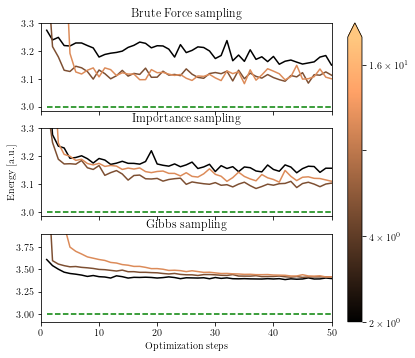

In [35]:
correct_energy = 3.0

# plot
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

#In case of more plots, we will make sure it's easy to add in a loop
yExact = np.ones(len(I_nh_2['BF_eta3']['Iteration']))*correct_energy


c = np.array([2,5,10,20])

cmap = plt.cm.get_cmap("copper")
norm = mpl.colors.SymLogNorm(linthresh=0.5,vmin=c[0], vmax=c[-1])

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

j=0

ax1.plot(I_nh_2['BF_eta2']['Iteration'],I_nh_2['BF_eta2']['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
ax2.plot(I_nh_2['IS_eta2']['Iteration'],I_nh_2['IS_eta2']['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
ax2.plot(I_nh_10['IS_eta2']['Iteration'],I_nh_10['IS_eta2']['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])


for i in range(3,4):
    #ax1.plot(I_nh_2['BF_eta'+str(i)]['Iteration'],I_nh_2['BF_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax1.plot(I_nh_10['BF_eta'+str(i)]['Iteration'],I_nh_10['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax1.plot(I_nh_20['BF_eta'+str(i)]['Iteration'],I_nh_20['BF_eta'+str(i)]['Energy'], color=cmap(norm(c[j+2])))#, color = color[j])

    #ax2.plot(I_nh_2['IS_eta'+str(i)]['Iteration'],I_nh_2['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    #ax2.plot(I_nh_10['IS_eta'+str(i)]['Iteration'],I_nh_10['IS_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])
    ax2.plot(I_nh_20['IS_eta'+str(i)]['Iteration'],I_nh_20['IS_eta'+str(i)]['Energy'],  color=cmap(norm(c[j+2])))#,label='$log2(eta)=-$'+str(i))#, color = color[j])

    ax3.plot(I_nh_2['GI_eta'+str(i)]['Iteration'],I_nh_2['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j])))#, color = color[j])
    ax3.plot(I_nh_10['GI_eta'+str(i)]['Iteration'],I_nh_10['GI_eta'+str(i)]['Energy'], color=cmap(norm(c[j+1])))#, color = color[j])
    ax3.plot(I_nh_20['GI_eta'+str(i)]['Iteration'],I_nh_20['GI_eta'+str(i)]['Energy'],  color=cmap(norm(c[j+2])))#, color = color[j])
    
    j+=1
ax1.set_title('Brute Force sampling')#, position=(0.75, 0.8))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.plot(I_nh_2['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax2.set_title('Importance sampling')#, position=(0.75, 0.8))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.set_ylabel("Energy [a.u.]")
ax2.plot(I_nh_2['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax3.set_title('Gibbs sampling')#, position=(0.8, 0.8))
ax3.set_xlabel("Optimization steps")
ax3.plot(nh_2['BF_eta3']['Iteration'], yExact, '--', color = 'g')

ax1.set_xlim([0,50])
ax2.set_xlim([0,50])
ax3.set_xlim([0,50])

low_limit1  = 0.995*correct_energy
high_limit1 = 1.1*correct_energy

low_limit2  = 0.995*correct_energy
high_limit2 = 1.1*correct_energy

low_limit3  = 0.97*correct_energy
high_limit3 = 1.3*correct_energy

ax1.set_ylim([low_limit1,high_limit1])
ax2.set_ylim([low_limit2,high_limit2])
ax3.set_ylim([low_limit3,high_limit3])


coloriarobaro=fig.colorbar(sm, ax=(ax1,ax2,ax3), shrink=1.0, fraction=0.05,extend='max')
coloriarobaro.locator=mpl.ticker.LogLocator(base=2)
coloriarobaro.update_ticks()

#plt.savefig(data_path('nh_against_eachother_first50.pgf'))
plt.show()

## Statistical analysis for best parameters

Here we use the blocking method, which is the same statistical method we used in last project. We will be using the best parameters for each sampling method from the previous analysis, which includes 
- Brute Force sampling: $\eta=2^{-2}$ and $N=5$.
- Importance sampling: $\eta=2^{-4}$ and $N=10$.
- Gibbs sampling: $\eta=2^{-2}$ and $N=2$.

In [36]:
I_best_param = {}

print("Loading files...")

I_best_param['bf'] = pd.read_fwf(data_path("Brute_Force/I_E_eta_2^-2_nh_5_nx_4MC_2^20.dat"))
I_best_param['is'] = pd.read_fwf(data_path("Importance_Sampling/I_E_eta_2^-2_nh_10_nx_4MC_2^20.dat"))
I_best_param['gi'] = pd.read_fwf(data_path("Gibbs/I_E_eta_2^-2_nh_2_nx_4MC_2^20sigma_0.750000.dat"))

I_best_param['bf_block'] = pd.read_fwf(data_path("Statistical_Analysis/I_BF_eta_2^-2_nh_5_nx_4MC_2^20.dat"))
I_best_param['is_block'] = pd.read_fwf(data_path("Statistical_Analysis/I_IS_eta_2^-2_nh_10_nx_4MC_2^20.dat"))
I_best_param['gi_block'] = pd.read_fwf(data_path("Statistical_Analysis/I_GI_eta_2^-2_nh_2_nx_4MC_2^20sigma_0.750000.dat"))

print("Loading completed")

Loading files...
Loading completed


How does the data look?

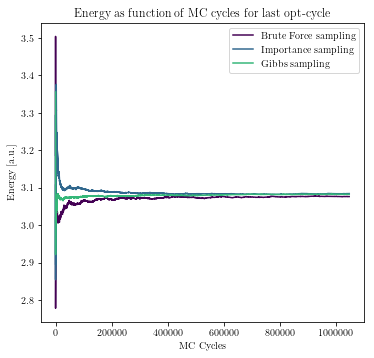

In [37]:
# plot
fig, ax1 = plt.subplots(1,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

x = np.linspace(1,len(I_best_param['bf_block']['Energy']),len(I_best_param['bf_block']['Energy']))
#print(cmap)
ax1.plot(x, I_best_param['bf_block']['Energy'], label='Brute Force sampling',color=cmap(norm(sigmas[0])))
ax1.plot(x, I_best_param['is_block']['Energy'], label='Importance sampling', color=cmap(norm(sigmas[1])))
ax1.plot(x, I_best_param['gi_block']['Energy'], label='Gibbs sampling', color=cmap(norm(sigmas[2])))
ax1.set_title('Energy as function of MC cycles for last opt-cycle')
ax1.set_xlabel('MC Cycles')
#ax1.set_xscale('log', basex=2)
ax1.set_ylabel('Energy [a.u.]')
ax1.legend(loc='best')
#plt.savefig(data_path('I_best_param_mc.pgf'))
plt.show()

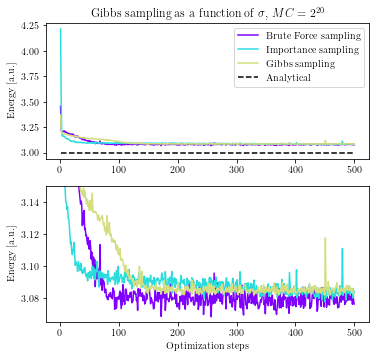

In [38]:
correct_energy = 3.0
# plot
fig, (ax1,ax2) = plt.subplots(2,1)
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

cmap = plt.cm.get_cmap("rainbow")
norm = mpl.colors.Normalize(vmin=sigmas[0], vmax=sigmas[-1])

#print(cmap)
ax1.plot(I_best_param['bf']['Iteration'], I_best_param['bf']['Energy'], label='Brute Force sampling',color=cmap(norm(sigmas[0])))
ax1.plot(I_best_param['bf']['Iteration'], I_best_param['is']['Energy'], label='Importance sampling', color=cmap(norm(sigmas[1])))
ax1.plot(I_best_param['bf']['Iteration'], I_best_param['gi']['Energy'], label='Gibbs sampling', color=cmap(norm(sigmas[2])))

yExact = np.ones(len(I_best_param['bf']['Iteration']))*correct_energy
ax1.plot(I_best_param['bf']['Iteration'],yExact,'--',color='Black', label='Analytical')
ax1.legend(loc='best')

ax1.set_ylabel("Energy [a.u.]")
#ax1.set_xlabel("Optimization steps")
ax1.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')

#print(cmap)
ax2.plot(I_best_param['bf']['Iteration'], I_best_param['bf']['Energy'], label='Brute Force sampling',color=cmap(norm(sigmas[0])))
ax2.plot(I_best_param['bf']['Iteration'], I_best_param['is']['Energy'], label='Importance sampling', color=cmap(norm(sigmas[1])))
ax2.plot(I_best_param['bf']['Iteration'], I_best_param['gi']['Energy'], label='Gibbs sampling', color=cmap(norm(sigmas[2])))

yExact = np.ones(len(I_best_param['bf']['Iteration']))*correct_energy
ax2.plot(I_best_param['bf']['Iteration'],yExact,'--',color='Black', label='Analytical')
#ax2.legend(loc='best')

ax2.set_ylim([3.065,3.15])
ax2.set_ylabel("Energy [a.u.]")
ax2.set_xlabel("Optimization steps")
#ax2.set_title('Gibbs sampling as a function of $\sigma$, $MC=2^{20}$')


#plt.savefig(data_path('best_param_opt.pgf'))

plt.show()

In [39]:
print('Brute Force sampling:')
bf_block = use_blocking("Statistical_Analysis/I_BF_eta_2^-2_nh_5_nx_4MC_2^20.dat", 2)
print(bf_block)
print('Importance sampling:')
is_block = use_blocking("Statistical_Analysis/I_IS_eta_2^-2_nh_10_nx_4MC_2^20.dat", 2)
print(is_block)
print('Gibbs sampling:')
gi_block = use_blocking("Statistical_Analysis/I_GI_eta_2^-2_nh_2_nx_4MC_2^20sigma_0.750000.dat", 2)
print(gi_block)

Brute Force sampling:
   Particles  Dimensions  Mean block  Variance block  STD block
0          2           2    3.071091        0.000002   0.001579
Importance sampling:
   Particles  Dimensions  Mean block  Variance block  STD block
0          2           2    3.086701        0.000001   0.001113
Gibbs sampling:
   Particles  Dimensions  Mean block  Variance block  STD block
0          2           2    3.079444    3.380435e-07   0.000581
